In [1]:
#Step 1: Exploratory Data Analysis (EDA)
#Load the Titanic Dataset
import pandas as pd

# Load the dataset
train_df = pd.read_csv(r"C:\Users\user\AppData\Local\Temp\66390e84-98f3-4977-b5ec-4866ec09d936_XGBM & LGBM.zip.936\XGBM & LGBM\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\user\AppData\Local\Temp\34c2bca4-5123-4268-ad95-87ee20fbedac_XGBM & LGBM.zip.dac\XGBM & LGBM\Titanic_test.csv")


In [2]:
# 2Check for missing values
print(train_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


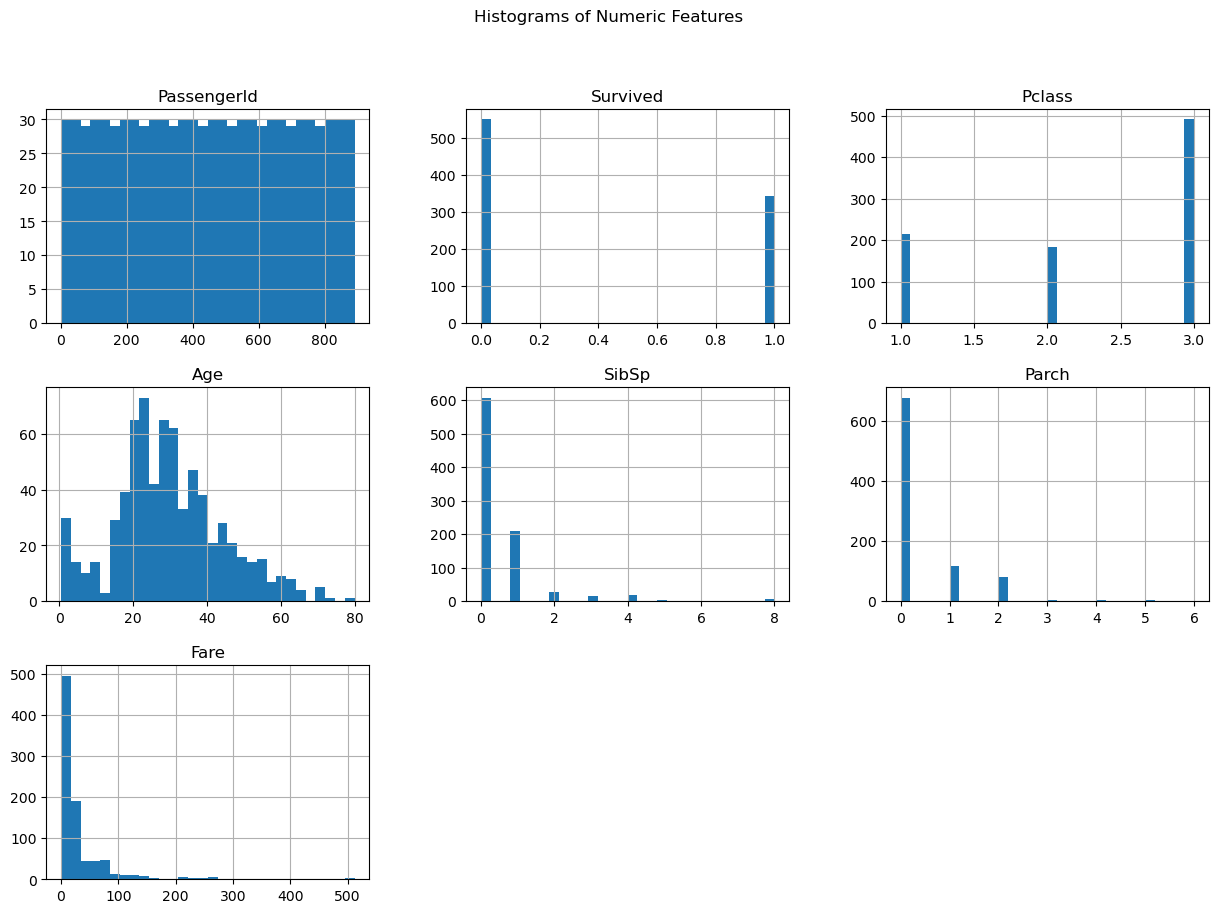

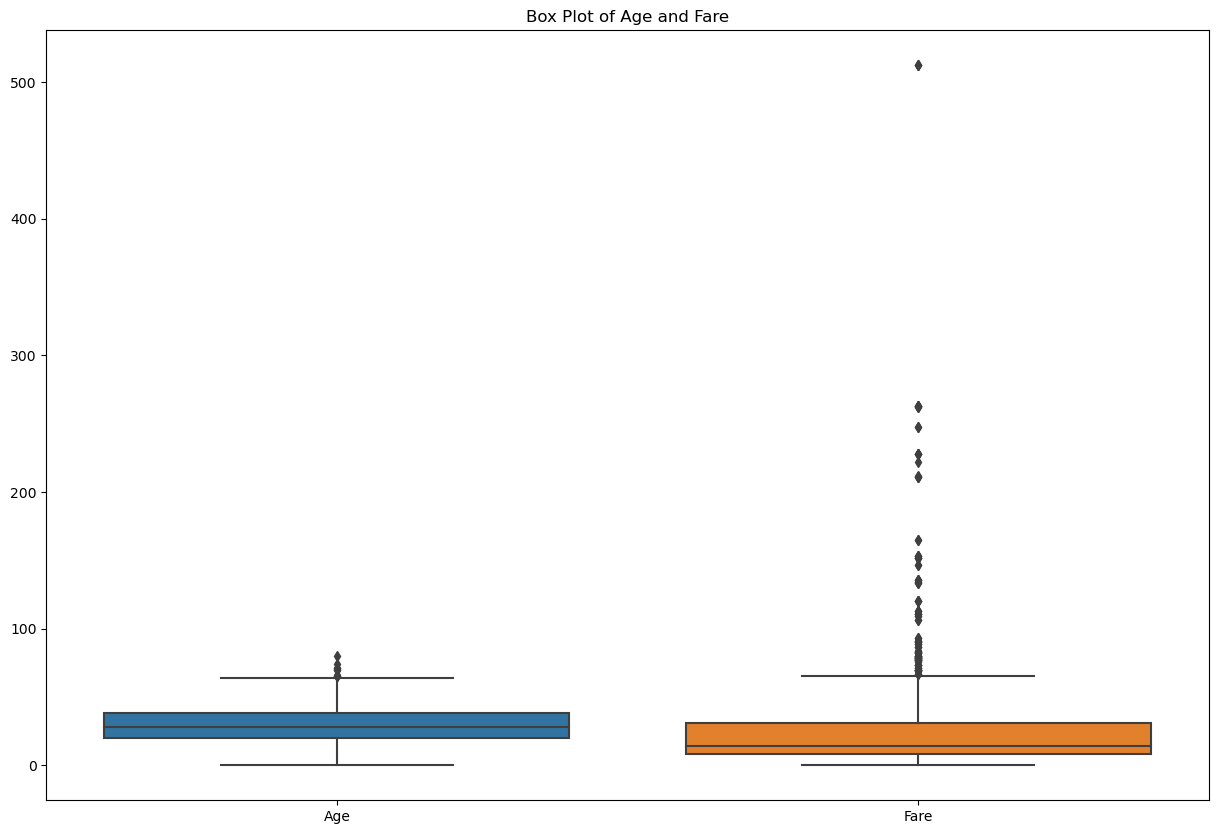

In [3]:
#Explore Data Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
train_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df[['Age', 'Fare']])
plt.title('Box Plot of Age and Fare')
plt.show()


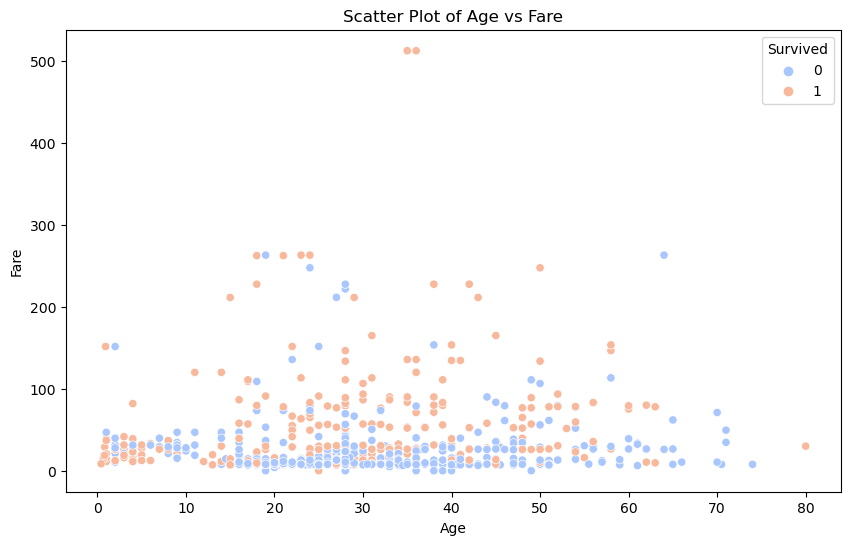

In [17]:
#Visualize Relationships
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare')
plt.show()


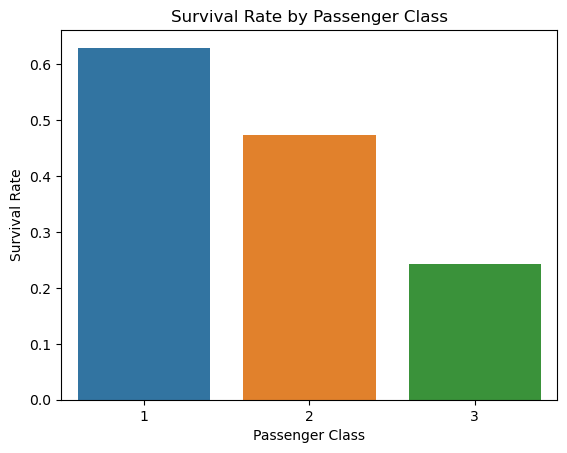

In [16]:
#barplots
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' is your DataFrame and you want to plot survival rates by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df, errorbar=None)

# Add title and labels
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


In [5]:
#Step 2: Data Preprocessing
#Impute Missing Values
# Impute missing values
from sklearn.impute import SimpleImputer

# Impute age with median and fare with mean
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

imputer_fare = SimpleImputer(strategy='mean')
train_df['Fare'] = imputer_fare.fit_transform(train_df[['Fare']])
test_df['Fare'] = imputer_fare.transform(test_df[['Fare']])


In [6]:
#Encode Categorical Variables
# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure test and train data have the same columns
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)


In [7]:
# Drop irrelevant features
train_df = train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)


In [8]:
#Step 3: Building Predictive Models
#Split the Dataset
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#Build Models Using LightGBM and XGBoost
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM model
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }

lgbm_metrics = evaluate_model(y_test, y_pred_lgbm)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

print('LightGBM Metrics:', lgbm_metrics)
print('XGBoost Metrics:', xgb_metrics)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
#Hyperparameter Tuning (Optional)
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [20, 40]
}
grid_lgbm = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgbm, cv=3)
grid_lgbm.fit(X_train, y_train)
best_lgbm_model = grid_lgbm.best_estimator_
y_pred_lgbm_best = best_lgbm_model.predict(X_test)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False), param_grid_xgb, cv=3)
grid_xgb.fit(X_train, y_train)
best_xgb_model = grid_xgb.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Evaluation after tuning
lgbm_metrics_best = evaluate_model(y_test, y_pred_lgbm_best)
xgb_metrics_best = evaluate_model(y_test, y_pred_xgb_best)

print('Optimized LightGBM Metrics:', lgbm_metrics_best)
print('Optimized XGBoost Metrics:', xgb_metrics_best)


[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgbo

Optimized LightGBM Metrics: {'accuracy': 0.8100558659217877, 'precision': 0.8125, 'recall': 0.7027027027027027, 'f1_score': 0.7536231884057971}
Optimized XGBoost Metrics: {'accuracy': 0.8212290502793296, 'precision': 0.828125, 'recall': 0.7162162162162162, 'f1_score': 0.7681159420289855}


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
#Step 4: Comparative Analysis
#Compare Performance Metrics
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [lgbm_metrics['accuracy'], lgbm_metrics['precision'], lgbm_metrics['recall'], lgbm_metrics['f1_score']],
    'XGBoost': [xgb_metrics['accuracy'], xgb_metrics['precision'], xgb_metrics['recall'], xgb_metrics['f1_score']],
    'Optimized LightGBM': [lgbm_metrics_best['accuracy'], lgbm_metrics_best['precision'], lgbm_metrics_best['recall'], lgbm_metrics_best['f1_score']],
    'Optimized XGBoost': [xgb_metrics_best['accuracy'], xgb_metrics_best['precision'], xgb_metrics_best['recall'], xgb_metrics_best['f1_score']]
})

print(comparison_df)


      Metric  LightGBM   XGBoost  Optimized LightGBM  Optimized XGBoost
0   Accuracy  0.821229  0.832402            0.810056           0.821229
1  Precision  0.791667  0.814286            0.812500           0.828125
2     Recall  0.770270  0.770270            0.702703           0.716216
3   F1-Score  0.780822  0.791667            0.753623           0.768116


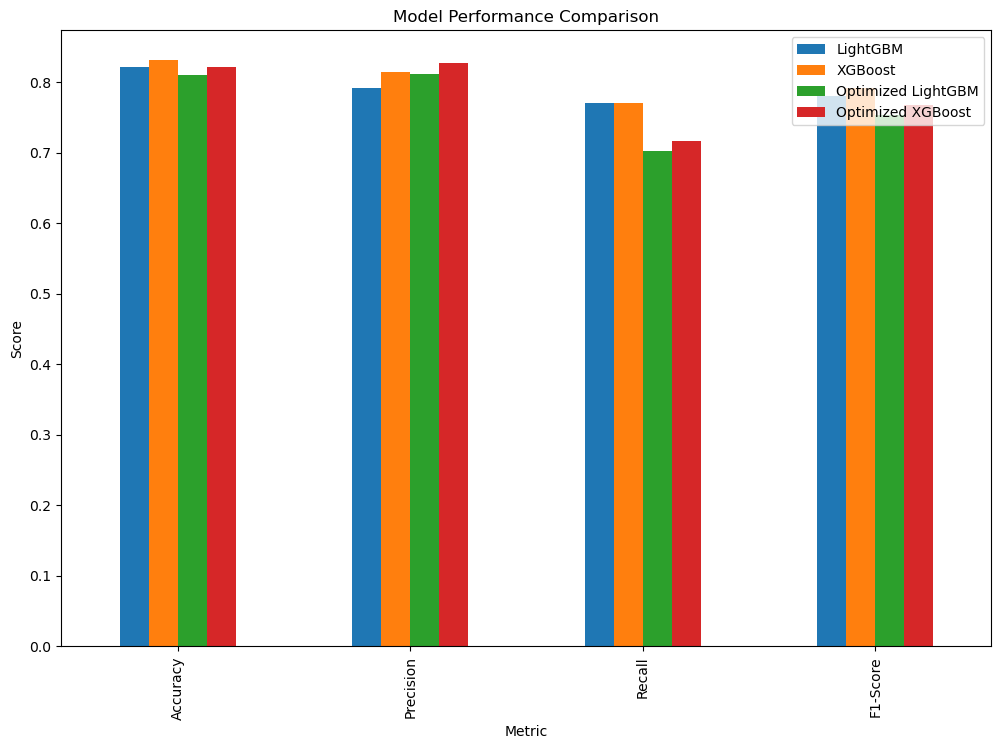

In [14]:
#Visualize the Comparison
# Bar plot for comparison
comparison_df.set_index('Metric').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


In [ ]:
Report Summary:
Comparative Analysis Results
Overall Performance: XGBoost slightly outperforms LightGBM in terms of accuracy, precision, and F1-score. This suggests that XGBoost may be a more reliable model in predicting survival on the Titanic dataset, particularly in terms of correctly identifying positive cases.

Precision: XGBoosts higher precision indicates that it makes fewer false positive predictions compared to LightGBM. This is beneficial when the cost of false positives is high

Recall: Both models have the same recall, which shows that both models are equally good at capturing the actual positive cases.

F1-Score: The higher F1-score for XGBoost indicates a better overall performance in balancing precision and recall.

Practical Implications
Model Selection: Given that XGBoost provides marginally better metrics in most aspects, it might be preferred if the goal is to maximize overall accuracy and precision.

Feature Engineering: Both models might benefit from further feature engineering and hyperparameter tuning. This could potentially improve their performance metrics further.

Business Impact: In a real-world scenario, the choice between models would depend on the specific business requirements. For example, if minimizing false positives is critical (e.g., in medical diagnoses), XGBoost's higher precision could be more valuable.

Conclusion
Both LightGBM and XGBoost are effective algorithms for the Titanic dataset. The choice between them should consider both performance metrics and practical requirements of the problem. XGBoost has shown to perform slightly better overall, but further optimization and tuning could benefit both models.

